In [1]:
 !pip uninstall tensorflow

Uninstalling tensorflow-1.15.0:
  Would remove:
    /usr/local/bin/estimator_ckpt_converter
    /usr/local/bin/freeze_graph
    /usr/local/bin/saved_model_cli
    /usr/local/bin/tensorboard
    /usr/local/bin/tf_upgrade_v2
    /usr/local/bin/tflite_convert
    /usr/local/bin/toco
    /usr/local/bin/toco_from_protos
    /usr/local/lib/python3.6/dist-packages/tensorflow-1.15.0.dist-info/*
    /usr/local/lib/python3.6/dist-packages/tensorflow/*
    /usr/local/lib/python3.6/dist-packages/tensorflow_core/*
Proceed (y/n)? y
  Successfully uninstalled tensorflow-1.15.0


In [2]:
!pip install tensorflow==2.1.0

     |████████████████████████████████| 421.8MB 41kB/s 
     |████████████████████████████████| 3.8MB 20.9MB/s 
     |████████████████████████████████| 450kB 48.6MB/s 
  Found existing installation: tensorboard 1.15.0
    Uninstalling tensorboard-1.15.0:
      Successfully uninstalled tensorboard-1.15.0
  Found existing installation: tensorflow-estimator 1.15.1
    Uninstalling tensorflow-estimator-1.15.1:
      Successfully uninstalled tensorflow-estimator-1.15.1


In [0]:
import tensorflow as tf

In [4]:
tf.__version__

'2.1.0'

In [0]:
import numpy as np

In [0]:
X=[]
Y=[]
for i in range(6):
  lst = list(range(i,i+4))
  x=list(map(lambda c: [c/10],lst))
  y=(i+4)/10
  X.append(x)
  Y.append(y)
X=np.array(X)
Y=np.array(Y)
print(X,Y)

[[[0. ]
  [0.1]
  [0.2]
  [0.3]]

 [[0.1]
  [0.2]
  [0.3]
  [0.4]]

 [[0.2]
  [0.3]
  [0.4]
  [0.5]]

 [[0.3]
  [0.4]
  [0.5]
  [0.6]]

 [[0.4]
  [0.5]
  [0.6]
  [0.7]]

 [[0.5]
  [0.6]
  [0.7]
  [0.8]]] [0.4 0.5 0.6 0.7 0.8 0.9]


In [0]:
model = tf.keras.Sequential([
                             tf.keras.layers.SimpleRNN(units= 10, return_sequences=False,input_shape=[4,1]),
                             tf.keras.layers.Dense(units=1)
])

model.compile(optimizer=tf.keras.optimizers.Adam(),loss='mse')
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_5 (SimpleRNN)     (None, 10)                120       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 11        
Total params: 131
Trainable params: 131
Non-trainable params: 0
_________________________________________________________________


In [0]:
history = model.fit(X,Y,epochs=100)

Train on 6 samples
Epoch 1/100
6/6 [==============================] - 2s 339ms/sample - loss: 0.0749
Epoch 2/100
6/6 [==============================] - 0s 1ms/sample - loss: 0.0659
Epoch 3/100
6/6 [==============================] - 0s 2ms/sample - loss: 0.0573
Epoch 4/100
6/6 [==============================] - 0s 1ms/sample - loss: 0.0494
Epoch 5/100
6/6 [==============================] - 0s 1ms/sample - loss: 0.0420
Epoch 6/100
6/6 [==============================] - 0s 1ms/sample - loss: 0.0352
Epoch 7/100
6/6 [==============================] - 0s 1ms/sample - loss: 0.0291
Epoch 8/100
6/6 [==============================] - 0s 854us/sample - loss: 0.0236
Epoch 9/100
6/6 [==============================] - 0s 977us/sample - loss: 0.0187
Epoch 10/100
6/6 [==============================] - 0s 958us/sample - loss: 0.0144
Epoch 11/100
6/6 [==============================] - 0s 890us/sample - loss: 0.0107
Epoch 12/100
6/6 [==============================] - 0s 807us/sample - loss: 0.0076
Epoch 

In [0]:
model.predict(np.array([[[0.6],[0.7],[0.8],[0.9]]]))

array([[-0.45814717]], dtype=float32)

In [0]:
X=[]
Y=[]
for i in range(3000):
  lst=np.random.rand(100)
  #print(lst)
  idx=np.random.choice(100,2,replace=False)
  #print(idx)
  zeros=np.zeros(100)
  zeros[idx]=1
  #print(zeros)
  X.append(list(zip(zeros,lst)))
  Y.append(np.prod(lst[idx]))

In [0]:
model = tf.keras.Sequential([
                             tf.keras.layers.SimpleRNN(units=30,input_shape=[100,2],return_sequences=True),
                             tf.keras.layers.SimpleRNN(units=30),
                             tf.keras.layers.Dense(1)
])

model.compile(optimizer=tf.keras.optimizers.Adam(),loss='mse')
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_8 (SimpleRNN)     (None, 100, 30)           990       
_________________________________________________________________
simple_rnn_9 (SimpleRNN)     (None, 30)                1830      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 31        
Total params: 2,851
Trainable params: 2,851
Non-trainable params: 0
_________________________________________________________________


In [0]:
X=np.array(X)
Y=np.array(Y)

In [0]:
X[0].shape

(100, 2)

In [0]:
X[:2560].shape

(2560, 100, 2)

In [0]:
history = model.fit(X[:2560],Y[:2560],epochs=100,validation_split=0.2)

Train on 2048 samples, validate on 512 samples
Epoch 1/100
2048/2048 [==============================] - 8s 4ms/sample - loss: 0.0600 - val_loss: 0.0561
Epoch 2/100
2048/2048 [==============================] - 8s 4ms/sample - loss: 0.0499 - val_loss: 0.0569
Epoch 3/100
2048/2048 [==============================] - 8s 4ms/sample - loss: 0.0510 - val_loss: 0.0617
Epoch 4/100
2048/2048 [==============================] - 7s 4ms/sample - loss: 0.0526 - val_loss: 0.0563
Epoch 5/100
2048/2048 [==============================] - 7s 4ms/sample - loss: 0.0505 - val_loss: 0.0567
Epoch 6/100
2048/2048 [==============================] - 8s 4ms/sample - loss: 0.0490 - val_loss: 0.0570
Epoch 7/100
2048/2048 [==============================] - 7s 4ms/sample - loss: 0.0498 - val_loss: 0.0645
Epoch 8/100
2048/2048 [==============================] - 8s 4ms/sample - loss: 0.0519 - val_loss: 0.0569
Epoch 9/100
2048/2048 [==============================] - 8s 4ms/sample - loss: 0.0489 - val_loss: 0.0563
Epoch 10

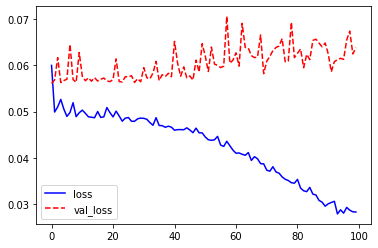

In [0]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'],'b-',label='loss')
plt.plot(history.history['val_loss'],'r--',label='val_loss')
plt.legend()
plt.show()

In [0]:
model.evaluate(X[2560:], Y[2560:])
prediction = model.predict(X[2560:2560+5])
# 5개 테스트 데이터에 대한 예측을 표시합니다.
for i in range(5):
    print(Y[2560+i], '\t', prediction[i][0], '\tdiff:', abs(prediction[i][0] - Y[2560+i]))
    
prediction = model.predict(X[2560:])
fail = 0
for i in range(len(prediction)):
    # 오차가 0.04 이상이면 오답입니다.
    if abs(prediction[i][0] - Y[2560+i]) > 0.04:
        fail += 1
print('correctness:', (440 - fail) / 440 * 100, '%')

440/440 [==============================] - 0s 875us/sample - loss: 0.0551
0.14100741263059094 	 0.25180256 	diff: 0.11079515103670642
0.19606244410686186 	 0.0073456736 	diff: 0.18871677047871044
0.5486879778076994 	 0.20445956 	diff: 0.3442284149100172
0.5017515440966434 	 0.2806816 	diff: 0.22106993398922148
0.3280690720473447 	 0.13707212 	diff: 0.1909969559107938
correctness: 14.318181818181818 %


In [0]:
model = tf.keras.Sequential([
                             tf.keras.layers.LSTM(units=30,return_sequences=True,input_shape=[100,2]),
                             tf.keras.layers.LSTM(units=30),
                             tf.keras.layers.Dense(1)
])

model.compile(optimizer=tf.keras.optimizers.Adam(),loss='mse')
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 30)           3960      
_________________________________________________________________
lstm_1 (LSTM)                (None, 30)                7320      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 31        
Total params: 11,311
Trainable params: 11,311
Non-trainable params: 0
_________________________________________________________________


In [0]:
history = model.fit(X[:2560],Y[:2560],epochs=100,validation_split=0.2)

Train on 2048 samples, validate on 512 samples
Epoch 1/100
2048/2048 [==============================] - 8s 4ms/sample - loss: 0.0510 - val_loss: 0.0550
Epoch 2/100
2048/2048 [==============================] - 1s 335us/sample - loss: 0.0497 - val_loss: 0.0556
Epoch 3/100
2048/2048 [==============================] - 1s 344us/sample - loss: 0.0496 - val_loss: 0.0560
Epoch 4/100
2048/2048 [==============================] - 1s 338us/sample - loss: 0.0497 - val_loss: 0.0550
Epoch 5/100
2048/2048 [==============================] - 1s 346us/sample - loss: 0.0496 - val_loss: 0.0551
Epoch 6/100
2048/2048 [==============================] - 1s 342us/sample - loss: 0.0495 - val_loss: 0.0578
Epoch 7/100
2048/2048 [==============================] - 1s 336us/sample - loss: 0.0495 - val_loss: 0.0556
Epoch 8/100
2048/2048 [==============================] - 1s 335us/sample - loss: 0.0493 - val_loss: 0.0562
Epoch 9/100
2048/2048 [==============================] - 1s 336us/sample - loss: 0.0494 - val_loss:

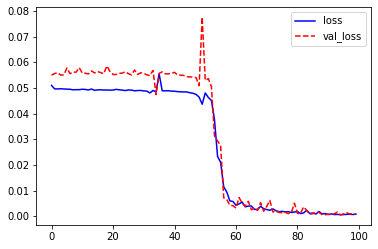

In [0]:
plt.plot(history.history['loss'],'b-',label='loss')
plt.plot(history.history['val_loss'],'r--',label='val_loss')
plt.legend()
plt.show()

In [0]:
model.evaluate(X[2560:], Y[2560:])
prediction = model.predict(X[2560:2560+5])
# 5개 테스트 데이터에 대한 예측을 표시합니다.
for i in range(5):
    print(Y[2560+i], '\t', prediction[i][0], '\tdiff:', abs(prediction[i][0] - Y[2560+i]))
    
prediction = model.predict(X[2560:])
fail = 0
for i in range(len(prediction)):
    # 오차가 0.04 이상이면 오답입니다.
    if abs(prediction[i][0] - Y[2560+i]) > 0.04:
        fail += 1
print('correctness:', (440 - fail) / 440 * 100, '%')

440/440 [==============================] - 1s 1ms/sample - loss: 8.5401e-04
0.14100741263059094 	 0.14395745 	diff: 0.002950038355317569
0.19606244410686186 	 0.21371913 	diff: 0.017656685455516075
0.5486879778076994 	 0.57418996 	diff: 0.025501983148874086
0.5017515440966434 	 0.541292 	diff: 0.03954046764118013
0.3280690720473447 	 0.34818006 	diff: 0.020110983570941432
correctness: 85.68181818181819 %


In [0]:
path_to_train_file = tf.keras.utils.get_file('train.txt', 'https://raw.githubusercontent.com/e9t/nsmc/master/ratings_train.txt')
path_to_test_file = tf.keras.utils.get_file('test.txt', 'https://raw.githubusercontent.com/e9t/nsmc/master/ratings_test.txt')

4898816/4893335 [==============================] - 0s 0us/step


In [0]:
train_text = open(path_to_train_file, 'rb').read().decode(encoding='utf-8')
test_text = open(path_to_test_file, 'rb').read().decode(encoding='utf-8')

In [0]:
train_Y = np.array([[int(row.split('\t')[2])] for row in train_text.split('\n')[1:] if row.count('\t') > 0])
test_Y = np.array([[int(row.split('\t')[2])] for row in test_text.split('\n')[1:] if row.count('\t') > 0])
print(train_Y.shape, test_Y.shape)
print(train_Y[:5])

(150000, 1) (50000, 1)
[[0]
 [1]
 [0]
 [0]
 [1]]


In [0]:
import re
# From https://github.com/yoonkim/CNN_sentence/blob/master/process_data.py
def clean_str(string):    
    string = re.sub(r"[^가-힣A-Za-z0-9(),!?\'\`]", " ", string)
    string = re.sub(r"\'s", " \'s", string)
    string = re.sub(r"\'ve", " \'ve", string)
    string = re.sub(r"n\'t", " n\'t", string)
    string = re.sub(r"\'re", " \'re", string)
    string = re.sub(r"\'d", " \'d", string)
    string = re.sub(r"\'ll", " \'ll", string)
    string = re.sub(r",", " , ", string)
    string = re.sub(r"!", " ! ", string)
    string = re.sub(r"\(", " \( ", string)
    string = re.sub(r"\)", " \) ", string)
    string = re.sub(r"\?", " \? ", string)
    string = re.sub(r"\s{2,}", " ", string)
    string = re.sub(r"\'{2,}", "\'", string)
    string = re.sub(r"\'", "", string)

    return string.lower()


train_text_X = [row.split('\t')[1] for row in train_text.split('\n')[1:] if row.count('\t') > 0]
train_text_X = [clean_str(sentence) for sentence in train_text_X]
# 문장을 띄어쓰기 단위로 단어 분리
sentences = [sentence.split(' ') for sentence in train_text_X]
for i in range(5):
    print(sentences[i])

['아', '더빙', '진짜', '짜증나네요', '목소리']
['흠', '포스터보고', '초딩영화줄', '오버연기조차', '가볍지', '않구나']
['너무재밓었다그래서보는것을추천한다']
['교도소', '이야기구먼', '솔직히', '재미는', '없다', '평점', '조정']
['사이몬페그의', '익살스런', '연기가', '돋보였던', '영화', '!', '스파이더맨에서', '늙어보이기만', '했던', '커스틴', '던스트가', '너무나도', '이뻐보였다']


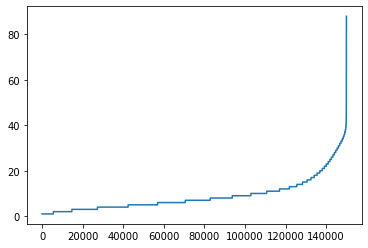

In [0]:
sentence_len = [len(sentence) for sentence in sentences]
sentence_len.sort()

plt.plot(sentence_len)
plt.show()

In [0]:
sentences_new=[]
for sentence in sentences:
  sentences_new.append([word[:5] for word in sentence][:25])
sentences = sentences_new
for i in range(5):
  print(sentences[i])

['아', '더빙', '진짜', '짜증나네요', '목소리']
['흠', '포스터보고', '초딩영화줄', '오버연기조', '가볍지', '않구나']
['너무재밓었']
['교도소', '이야기구먼', '솔직히', '재미는', '없다', '평점', '조정']
['사이몬페그', '익살스런', '연기가', '돋보였던', '영화', '!', '스파이더맨', '늙어보이기', '했던', '커스틴', '던스트가', '너무나도', '이뻐보였다']


In [0]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [0]:
tokenizer = Tokenizer(num_words=20000)
tokenizer.fit_on_texts(sentences)
train_X=tokenizer.texts_to_sequences(sentences)

In [0]:
train_X[:5]

[[25, 884, 8, 5795, 1111],
 [588, 5796, 6697],
 [],
 [71, 346, 31, 35, 10468],
 [106, 5338, 4, 2, 2169, 869, 573]]

In [0]:
train_X=pad_sequences(train_X,padding='post')
train_X[:5]

array([[   25,   884,     8,  5795,  1111,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0],
       [  588,  5796,  6697,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0],
       [    0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0],
       [   71,   346,    31,    35, 10468,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0],
       [  106,  5338,     4,     2,  2169,   869,   573,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0]],

In [0]:
model = tf.keras.Sequential([
                             tf.keras.layers.Embedding(20000,300,input_length=25),
                             tf.keras.layers.LSTM(units=50),
                             tf.keras.layers.Dense(2,activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(),loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 25, 300)           6000000   
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                70200     
_________________________________________________________________
dense_6 (Dense)              (None, 2)                 102       
Total params: 6,070,302
Trainable params: 6,070,302
Non-trainable params: 0
_________________________________________________________________


In [0]:
history=model.fit(train_X,train_Y,epochs=5,batch_size=128,validation_split=0.2)

Train on 120000 samples, validate on 30000 samples
Epoch 1/5
120000/120000 [==============================] - 58s 484us/sample - loss: 0.4344 - accuracy: 0.7841 - val_loss: 0.3763 - val_accuracy: 0.8231
Epoch 2/5
120000/120000 [==============================] - 57s 472us/sample - loss: 0.3223 - accuracy: 0.8489 - val_loss: 0.3784 - val_accuracy: 0.8232
Epoch 3/5
120000/120000 [==============================] - 57s 471us/sample - loss: 0.2668 - accuracy: 0.8737 - val_loss: 0.4155 - val_accuracy: 0.8163
Epoch 4/5
120000/120000 [==============================] - 56s 470us/sample - loss: 0.2214 - accuracy: 0.8923 - val_loss: 0.4840 - val_accuracy: 0.8086
Epoch 5/5
120000/120000 [==============================] - 56s 469us/sample - loss: 0.1864 - accuracy: 0.9093 - val_loss: 0.5442 - val_accuracy: 0.8104


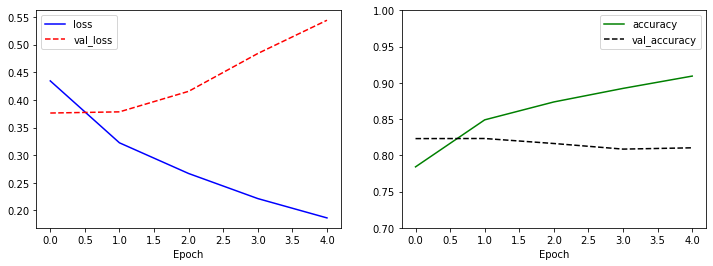

In [0]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.7, 1)
plt.legend()

plt.show()

In [0]:
test_text_X = [row.split('\t')[1] for row in test_text.split('\n')[1:] if row.count('\t') > 0]
test_text_X = [clean_str(sentence) for sentence in test_text_X]
sentences = [sentence.split(' ') for sentence in test_text_X]
sentences_new = []
for sentence in sentences:
    sentences_new.append([word[:5] for word in sentence][:25])
sentences = sentences_new

test_X = tokenizer.texts_to_sequences(sentences)
test_X = pad_sequences(test_X, padding='post')

model.evaluate(test_X, test_Y, verbose=0)

[0.5538448736047745, 0.80186]

In [0]:
test_sentence = '재미있을 줄 알았는데 완전 실망했다. 너무 졸리고 돈이 아까웠다.'
test_sentence = test_sentence.split(' ')
test_sentences = []
now_sentence = []
for word in test_sentence:
    now_sentence.append(word)
    test_sentences.append(now_sentence[:])
    
test_X_1 = tokenizer.texts_to_sequences(test_sentences)
test_X_1 = pad_sequences(test_X_1, padding='post', maxlen=25)
prediction = model.predict(test_X_1)
for idx, sentence in enumerate(test_sentences):
    print(sentence)
    print(prediction[idx])

['재미있을']
[0.49375448 0.50624555]
['재미있을', '줄']
[0.399485 0.600515]
['재미있을', '줄', '알았는데']
[0.43345955 0.5665404 ]
['재미있을', '줄', '알았는데', '완전']
[0.43105182 0.5689482 ]
['재미있을', '줄', '알았는데', '완전', '실망했다.']
[0.43105182 0.5689482 ]
['재미있을', '줄', '알았는데', '완전', '실망했다.', '너무']
[0.4859297 0.5140703]
['재미있을', '줄', '알았는데', '완전', '실망했다.', '너무', '졸리고']
[0.9852455  0.01475453]
['재미있을', '줄', '알았는데', '완전', '실망했다.', '너무', '졸리고', '돈이']
[9.991441e-01 8.559276e-04]
['재미있을', '줄', '알았는데', '완전', '실망했다.', '너무', '졸리고', '돈이', '아까웠다.']
[9.991441e-01 8.559276e-04]


In [5]:
path_to_file = tf.keras.utils.get_file('input.txt','http://bit.ly/2Mc3SOV')

62013440/62012502 [==============================] - 0s 0us/step


In [0]:
train_text=open(path_to_file,'rb').read().decode(encoding='utf-8')

In [7]:
import re
# From https://github.com/yoonkim/CNN_sentence/blob/master/process_data.py
def clean_str(string):    
    string = re.sub(r"[^가-힣A-Za-z0-9(),!?\'\`]", " ", string)
    string = re.sub(r"\'ll", " \'ll", string)
    string = re.sub(r",", " , ", string)
    string = re.sub(r"!", " ! ", string)
    string = re.sub(r"\(", "", string)
    string = re.sub(r"\)", "", string)
    string = re.sub(r"\?", " \? ", string)
    string = re.sub(r"\s{2,}", " ", string)
    string = re.sub(r"\'{2,}", "\'", string)
    string = re.sub(r"\'", "", string)

    return string


train_text = train_text.split('\n')
train_text = [clean_str(sentence) for sentence in train_text]
train_text_X = []
for sentence in train_text:
    train_text_X.extend(sentence.split(' '))
    train_text_X.append('\n')
    
train_text_X = [word for word in train_text_X if word != '']

print(train_text_X[:20])

['태조', '이성계', '선대의', '가계', '목조', '이안사가', '전주에서', '삼척', '의주를', '거쳐', '알동에', '정착하다', '\n', '태조', '강헌', '지인', '계운', '성문', '신무', '대왕']


In [0]:
import numpy as np

In [9]:
vocab = sorted(set(train_text_X))
vocab.append('UNK')
print ('{} unique words'.format(len(vocab)))

332640 unique words


In [0]:
word2idx = {u:i for i, u in enumerate(vocab)}
idx2word = np.array(vocab)

In [0]:
text_as_int = np.array([word2idx[c] for c in train_text_X])

In [0]:
seq_length=25
examples_per_epoch = len(text_as_int)//seq_length
sentence_dataset=tf.data.Dataset.from_tensor_slices(text_as_int)

In [0]:
sentence_dataset = sentence_dataset.batch(seq_length+1, drop_remainder=True)

In [0]:
def split_input_target(chunk):
    return [chunk[:-1], chunk[-1]]

train_dataset = sentence_dataset.map(split_input_target)

In [0]:
BATCH_SIZE = 128
steps_per_epoch = examples_per_epoch // BATCH_SIZE
BUFFER_SIZE = 10000

train_dataset = train_dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE, drop_remainder=True)

In [0]:
total_word=len(vocab)

In [17]:
model = tf.keras.Sequential([
                             tf.keras.layers.Embedding(total_word,100,input_length=seq_length),
                             tf.keras.layers.LSTM(units=100,return_sequences=True),
                             tf.keras.layers.Dropout(0.2),
                             tf.keras.layers.LSTM(units=100),
                             tf.keras.layers.Dense(total_word,activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(),loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 25, 100)           33264000  
_________________________________________________________________
lstm (LSTM)                  (None, 25, 100)           80400     
_________________________________________________________________
dropout (Dropout)            (None, 25, 100)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dense (Dense)                (None, 332640)            33596640  
Total params: 67,021,440
Trainable params: 67,021,440
Non-trainable params: 0
_________________________________________________________________


In [0]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

def testmodel(epoch, logs):
    if epoch % 5 != 0 and epoch != 49:
        return
    test_sentence = train_text[0]

    next_words = 100
    for _ in range(next_words):
        test_text_X = test_sentence.split(' ')[-seq_length:]
        test_text_X = np.array([word2idx[c] if c in word2idx else word2idx['UNK'] for c in test_text_X])
        test_text_X = pad_sequences([test_text_X], maxlen=seq_length, padding='pre', value=word2idx['UNK'])

        output_idx = model.predict_classes(test_text_X)
        test_sentence += ' ' + idx2word[output_idx[0]]
    
    print()
    print(test_sentence)
    print()

testmodelcb = tf.keras.callbacks.LambdaCallback(on_epoch_end=testmodel)

history = model.fit(train_dataset.repeat(), epochs=50, steps_per_epoch=steps_per_epoch, callbacks=[testmodelcb], verbose=2)

Train for 2135 steps
Epoch 1/50

 태조 이성계 선대의 가계 목조 이안사가 전주에서 삼척 의주를 거쳐 알동에 정착하다  , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , ,

2135/2135 - 776s - loss: 9.1612 - accuracy: 0.0749
Epoch 2/50
2135/2135 - 760s - loss: 8.0626 - accuracy: 0.0840
Epoch 3/50
2135/2135 - 758s - loss: 7.7083 - accuracy: 0.0972
Epoch 4/50
2135/2135 - 761s - loss: 7.4853 - accuracy: 0.1075
Epoch 5/50
2135/2135 - 759s - loss: 7.2559 - accuracy: 0.1168
Epoch 6/50

 태조 이성계 선대의 가계 목조 이안사가 전주에서 삼척 의주를 거쳐 알동에 정착하다  , 각 보내어 보내어 영좌 것을 축문을 영좌 것을 나아가 영좌 를 보내어 , , 각 보내어 보내어 영좌 를 나아가 보내어 , , 그 인도하여 인도하여 인도하여 인도하여 인도하여 인도하여 인도하여 , , , 그 보내어 인도하여 인도하여 인도하여 , , 그 그 인도하여 , , 그 인도하여 인도하여 , , 그 인도하여 인도하여 인도하여 , , 그 인도하여 인도하여 , , 그 인도하여 인도하여 인도하여 , , 그 인도하여 인도하여 , , 그 인도하여 인도하여 , , 그 인도하여 인도하여 인도하여 , , 그 인도하여 인도하여 , , 그 인도하여 인도하여 인도하여 , , 그 인도하여 인도하여 ,

2135/2135 - 761s - loss: 6.

In [0]:
!pip install jamotools

In [0]:
import jamotools

train_text = open(path_to_file, 'rb').read().decode(encoding='utf-8')
s = train_text[:100]
print(s)

# 한글 텍스트를 자모 단위로 분리해줍니다. 한자 등에는 영향이 없습니다.
s_split = jamotools.split_syllables(s)
print(s_split)

In [0]:
# 7.46 자모 토큰화
# 텍스트를 자모 단위로 나눕니다. 데이터가 크기 때문에 약간 시간이 걸립니다.
train_text_X = jamotools.split_syllables(train_text)
vocab = sorted(set(train_text_X))
vocab.append('UNK')
print ('{} unique characters'.format(len(vocab)))

# vocab list를 숫자로 맵핑하고, 반대도 실행합니다.
char2idx = {u:i for i, u in enumerate(vocab)}
idx2char = np.array(vocab)

text_as_int = np.array([char2idx[c] for c in train_text_X])

# word2idx 의 일부를 알아보기 쉽게 print 해봅니다.
print('{')
for char,_ in zip(char2idx, range(10)):
    print('  {:4s}: {:3d},'.format(repr(char), char2idx[char]))
print('  ...\n}')

print('index of UNK: {}'.format(char2idx['UNK']))

In [0]:
# 7.48 학습 데이터세트 생성
seq_length = 80
examples_per_epoch = len(text_as_int) // seq_length
char_dataset = tf.data.Dataset.from_tensor_slices(text_as_int)

char_dataset = char_dataset.batch(seq_length+1, drop_remainder=True)
for item in char_dataset.take(1):
    print(idx2char[item.numpy()])
    print(item.numpy())
    
def split_input_target(chunk):
    return [chunk[:-1], chunk[-1]]

train_dataset = char_dataset.map(split_input_target)
for x,y in train_dataset.take(1):
    print(idx2char[x.numpy()])
    print(x.numpy())
    print(idx2char[y.numpy()])
    print(y.numpy())
    
BATCH_SIZE = 256
steps_per_epoch = examples_per_epoch // BATCH_SIZE
BUFFER_SIZE = 10000

train_dataset = train_dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE, drop_remainder=True)

In [0]:
# 7.49 자소 단위 생성 모델 정의
total_chars = len(vocab)
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(total_chars, 100, input_length=seq_length),
    tf.keras.layers.LSTM(units=400),
    tf.keras.layers.Dense(total_chars, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

In [0]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

def testmodel(epoch, logs):
    if epoch % 5 != 0 and epoch != 99:
        return
    
    test_sentence = train_text[:48]
    test_sentence = jamotools.split_syllables(test_sentence)

    next_chars = 300
    for _ in range(next_chars):
        test_text_X = test_sentence[-seq_length:]
        test_text_X = np.array([char2idx[c] if c in char2idx else char2idx['UNK'] for c in test_text_X])
        test_text_X = pad_sequences([test_text_X], maxlen=seq_length, padding='pre', value=char2idx['UNK'])

        output_idx = model.predict_classes(test_text_X)
        test_sentence += idx2char[output_idx[0]]
    
    print()
    print(jamotools.join_jamos(test_sentence))
    print()

testmodelcb = tf.keras.callbacks.LambdaCallback(on_epoch_end=testmodel)

history = model.fit(train_dataset.repeat(), epochs=100, steps_per_epoch=steps_per_epoch, callbacks=[testmodelcb], verbose=2)